In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/1Ee0u_4Bc_zYLLcdj7yL-QwkE7_O4ylnHFQj68QlICdo/export?format=csv&id')
data = r.content

In [3]:
from io import BytesIO

df_siswa = pd.read_csv(BytesIO(data))

In [4]:
df_siswa.head()

,no,nama,latitude,longitude,nama_sekolah
0,1,Ihsan,-5.169075,119.414552,SMAN 3
1,2,Aldy,-5.166001,119.413162,SMAN 2
2,3,Adel,-5.131854,119.418400,SMAN 1
3,4,Intan,-5.118539,119.417350,SMAN 4
4,5,Ikhlas,-5.171935,119.412924,SMAN 2


## Membuat Bar Chart Berdasarkan Jumlah Siswa Setiap SMA

In [5]:
df_sekolah = df_siswa.groupby("nama_sekolah").count().drop(["nama", "latitude", "longitude"], axis=1)

In [6]:
df_sekolah.rename({"no" : "Jumlah_Siswa"}, axis=1, inplace=True)

In [7]:
df_sekolah

,Jumlah_Siswa
nama_sekolah,
SMAN 1,43
SMAN 2,48
SMAN 3,37
SMAN 4,26
SMAN 5,46


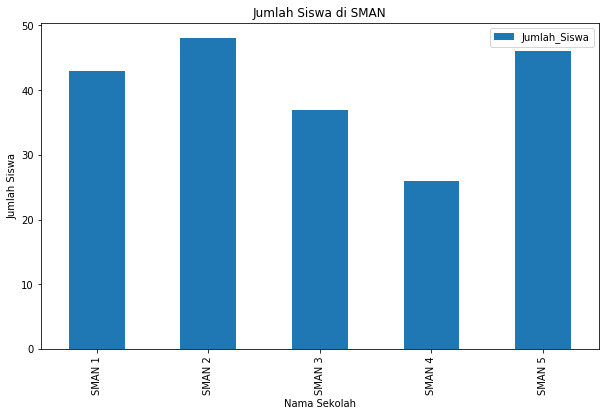

In [8]:
df_sekolah.plot(kind="bar", figsize=(10, 6))

plt.xlabel('Nama Sekolah')
plt.ylabel('Jumlah Siswa')
plt.title('Jumlah Siswa di SMAN')

plt.show()

## Menampilkan perbandingan jumlah siswa masing-masing sekolah dengan Pie Chart

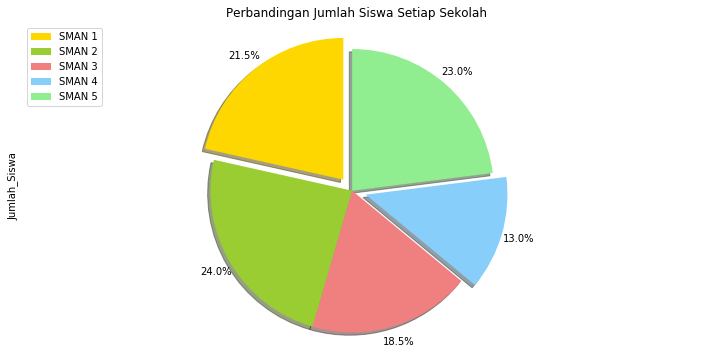

In [9]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.1, 0, 0, 0.1, 0] # ratio for each continent with which to offset each wedge.

df_sekolah['Jumlah_Siswa'].plot(kind='pie',
                                figsize=(12, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,         
                                pctdistance=1.12,    
                                colors=colors_list,  
                                explode=explode_list 
                                )

plt.title('Perbandingan Jumlah Siswa Setiap Sekolah')
plt.axis('equal') 

plt.legend(labels=df_sekolah.index, loc='upper left')

plt.show()

## Menampilkan Lokasi Tempat Tinggal pada Peta

In [10]:
import folium

In [11]:
makassar = [-5.14, 119.4221]

In [12]:
peta_mks = folium.Map(makassar, zoom_start=13)
peta_mks

In [13]:
# Menambahkan lokasi sekolah
df_lokasi_sekolah = pd.DataFrame(data = [['SMAN 1', -5.135038, 119.418647],
                                         ['SMAN 2', -5.165785, 119.407957],
                                         ['SMAN 3', -5.168665, 119.413187],
                                         ['SMAN 4', -5.116794, 119.418928],
                                         ['SMAN 5', -5.148765, 119.460942]],
                                columns=['Nama Sekolah', 'Latitude', 'Longitude'])

df_lokasi_sekolah

,Nama Sekolah,Latitude,Longitude
0,SMAN 1,-5.135038,119.418647
1,SMAN 2,-5.165785,119.407957
2,SMAN 3,-5.168665,119.413187
3,SMAN 4,-5.116794,119.418928
4,SMAN 5,-5.148765,119.460942


In [14]:
marker_color = ['red', 'blue', 'green', 'yellow', 'black']
nama_sekolah = ['SMAN 1', 'SMAN 2', 'SMAN 3', 'SMAN 4', 'SMAN 5']
latitude = df_siswa.latitude
longitude = df_siswa.longitude
nama = df_siswa.nama

lokasi = folium.map.FeatureGroup()

for i in range(5):
    condition = df_siswa['nama_sekolah'] == nama_sekolah[i]
    for lat, lng, label in zip(latitude[condition], longitude[condition], nama[condition]):
        lokasi.add_child(
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                fill=True,
                fill_color=marker_color[i],
                fill_opacity=1,
                stroke=False
            )
        )

for lat, lng, label in zip(df_lokasi_sekolah.Latitude, df_lokasi_sekolah.Longitude, df_lokasi_sekolah['Nama Sekolah']):
    lokasi.add_child(
        folium.Marker(
            [lat, lng],
            popup=label
        )
    )

peta_mks.add_child(lokasi)